# <strong> A - Importation des modules </strong>
---

In [1]:
############################################
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###########################################
import pandas as pd
import spacy
import joblib
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

###########################################
import import_ipynb
from Brice_KENGNI_ZANGUIM_2_1_script_functions_17_08_2022 import *


importing Jupyter notebook from Brice_KENGNI_ZANGUIM_2_1_script_functions_17_08_2022.ipynb


# <strong> B - Importation de données </strong> 

In [2]:
train_data = {"lemma":pd.read_csv(f"train_data_lemma.csv") ,
              "stem":pd.read_csv(f"train_data_stem.csv")
             }
validation_data = {"lemma":pd.read_csv(f"validation_data_lemma.csv") , 
                   "stem":pd.read_csv(f"validation_data_stem.csv")
                  }
test_data = {"lemma":pd.read_csv(f"test_data_lemma.csv") , 
             "stem":pd.read_csv(f"test_data_stem.csv")
            }

# Suppression de valeurs manquantes et sauvegarde

for i in [ "lemma", "stem" ] :
    train_data[i].dropna(inplace=True)
    train_data[i].to_csv(f"train_data_{i}.csv", index=False)
    
    validation_data[i].dropna(inplace=True)
    validation_data[i].to_csv(f"validation_data_{i}.csv", index=False)

    test_data[i].dropna(inplace=True)
    test_data[i].to_csv(f"test_data_{i}.csv", index=False)


# <strong> C - Features engineering </strong> 

In [3]:
encoding_type = "TFIDF"
n_gram_range = (1,1)

In [4]:
train_data_emb, vocab = {}, {}

for k in train_data.keys() :
    train_data_emb[k] = document_encoding_algo(train_data[k],'text',encoding_type, min_df = 0.0001 , max_df = 1., 
                                        n_gram=n_gram_range, get_vocabulary=False)

    vocab[k] = document_encoding_algo(train_data[k],'text',encoding_type, min_df = 0.0001 , max_df = 1., n_gram=n_gram_range, get_vocabulary=True)

train_data_emb["lemma"].head()

,aaah,aah,aaron,abandon,abc,ability,abit,able,absolute,absolutely,...,yup,yur,zac,zero,zip,zoe,zombie,zone,zoo,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264086,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
validation_data_emb= {}

for k in train_data.keys() :
    validation_data_emb[k] = document_encoding_algo(validation_data[k],'text',encoding_type, min_df = 0.0001 , max_df = 1.0, 
                                             n_gram=n_gram_range, vocabulaire=vocab[k] )
    
validation_data_emb["lemma"].head()

,aaah,aah,aaron,abandon,abc,ability,abit,able,absolute,absolutely,...,yup,yur,zac,zero,zip,zoe,zombie,zone,zoo,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_data_emb = {}

for k in test_data.keys() :
    test_data_emb[k] = document_encoding_algo(test_data[k],'text',encoding_type, min_df = 0.0001 , max_df = 1.0,
                                           n_gram=n_gram_range, vocabulaire=vocab[k])
test_data_emb["lemma"].head()

,aaah,aah,aaron,abandon,abc,ability,abit,able,absolute,absolutely,...,yup,yur,zac,zero,zip,zoe,zombie,zone,zoo,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <strong> F - Modèle simple : XGBOOST  </strong> 

* ### <strong>  Scorer </strong>

In [7]:
my_scorer = metrics.make_scorer( my_cost , scorer = True, poids = 0.7 , greater_is_better=False ,
                                 needs_proba= False ,needs_threshold=True )

* ### <strong>  Pipaline et Grid_cv </strong>

In [8]:
params = { "XGBOOST__n_estimators" : [200,250,300] }

pipe_classifier =  {}
for proc in ["lemma", "stem"]: 
    pipe_classifier[proc] = Pipeline([ ("RobustScaler", RobustScaler() ),
                                       ("XGBOOST", xgb.XGBClassifier( n_jobs = os.cpu_count() , objective="binary:logistic",
                                                          n_estimators=100,) )
                                     ])

grid_cv =  {}
for proc in ["lemma", "stem"]: 
    grid_cv[proc] = GridSearchCV( pipe_classifier[proc] , param_grid= params, cv = 3 , scoring = my_scorer, 
                                 return_train_score=True, error_score='raise', verbose=4 )

* ### <strong>  Cross Validation </strong>

In [9]:
cross_validate = False

if cross_validate :
    total_score = [ ]

    for proc in [ "lemma" , "stem" ] :
        print(f"Processing par {proc} :")
        grid_cv[proc].fit(train_data_emb[proc] , train_data[proc].labels )

        total_score.append({
                            "modèle" : f"XGBOOST_{proc}" ,
                            "Meilleur score" : grid_cv[proc].best_score_ ,
                            "Meilleurs paramètres" : grid_cv[proc].best_params_ ,
                            })
        
    df_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])
    df_recap.to_csv("modèle_simple_cross_validation.csv",index = False)
    #df_recap#.style.highlight_max(axis = 0 , color = 'green').highlight_min(axis = 0 , color="red" )
    
    #  Le meilleur modèle de preprocessing est retenu
    best_proc = df_recap.loc[ np.argmax(df_recap.loc[:,"Meilleur score"]) , "modèle"][8:]
    pipe_classifier = grid_cv[best_proc].best_estimator_
    
    # Sauvegarde de la meilleure méthode de processing dans un fichier texte
    with open("best_proc_simple_model.txt", "w", encoding="UTF-8") as f :
        f.write(best_proc)
    
    # Sauvegarde du meilleur modèle
    joblib.dump( pipe_classifier ,"best_simple_model.sav" )
else :
    # Recapitulatif de la cross validation
    df_recap = pd.read_csv("modèle_simple_cross_validation.csv")
    # Meilleur modèle
    #pipe_classifier = joblib.load("best_simple_model.sav")
    # Meilleure méthode de processing
    with open("best_proc_simple_model.txt", "r") as f :
        best_proc = f.read()


* ### <strong> Meilleur méthode de préprocessing  </strong>

In [10]:
print(best_proc)

stem


* ### <strong> Recapitulatif de la cross validation  </strong>

In [11]:
df_recap

,modèle,Meilleur score,Meilleurs paramètres
0,XGBOOST_lemma,-0.239984,{'XGBOOST__n_estimators': 300}
1,XGBOOST_stem,-0.233766,{'XGBOOST__n_estimators': 300}


In [12]:
pipe_classifier = Pipeline([ ("RobustScaler", RobustScaler() ),
                             ("XGBOOST", xgb.XGBClassifier( n_jobs = os.cpu_count() , objective="binary:logistic",
                                                          n_estimators=300,) )
                                     ])

pipe_classifier.fit( train_data_emb[best_proc] , train_data[best_proc].labels)

[01:18:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('RobustScaler', RobustScaler()),
                ('XGBOOST',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

* ### <strong>  Acquisition des probabilités qu'un tweet soit positif  </strong>

In [13]:
Y_proba_XGB = pipe_classifier.predict_proba(test_data_emb[best_proc])[:,1]

* ### <strong>  Heatmap : Variation de Coût métier avec le poids et la valeur de seuil de probabilité  </strong>

In [14]:
weight = np.linspace( 0 , 1. , 100 )
thres = np.linspace( 0. , 1. , 100  )

cout_metier = [[ my_cost( test_data[best_proc].labels, Y_proba_XGB, poids=w, seuil=t) for t in thres ] for w in weight ]

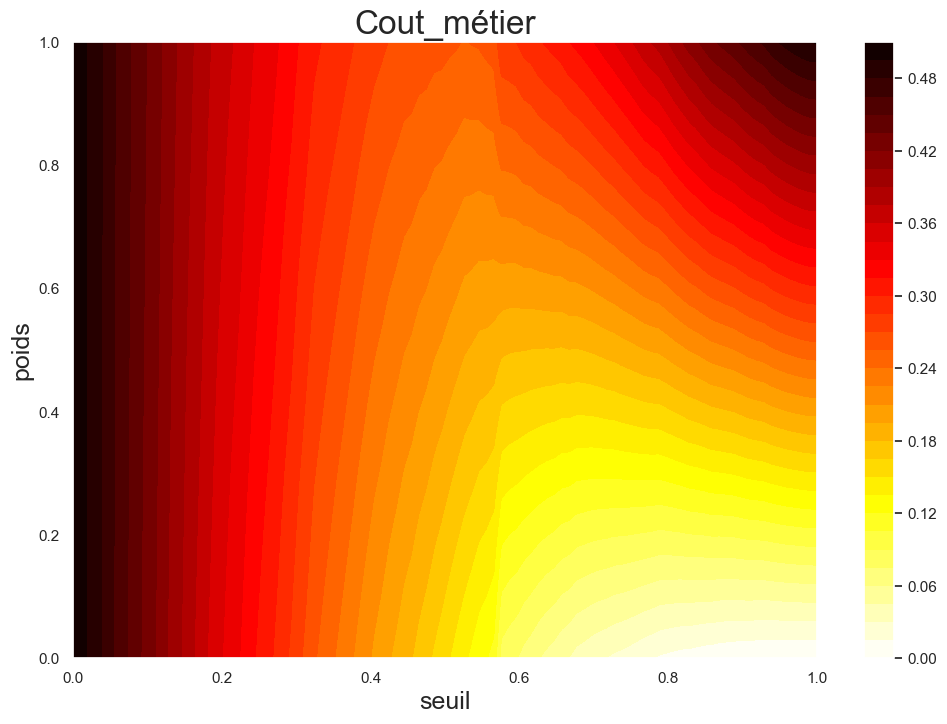

In [15]:
figsize = (12,8)
plt.figure(figsize=figsize)
#thres, weight = np.meshgrid(thres , weight, sparse=False)
plt.title("Cout_métier",size =2*figsize[0])
plt.contourf(thres , weight , cout_metier, 40, cmap = "hot_r")
#plt.axis('scaled')
plt.ylabel("poids", size = 1.5*figsize[0] )
plt.xlabel("seuil", size = 1.5*figsize[0])
plt.colorbar()
plt.show()

* ### <strong>  Choix de la valeur du Poids </strong>

In [16]:
Poids = 0.7

* ### <strong>  Représentation graphique des métriques usuelles et fonction de coute métier  </strong>

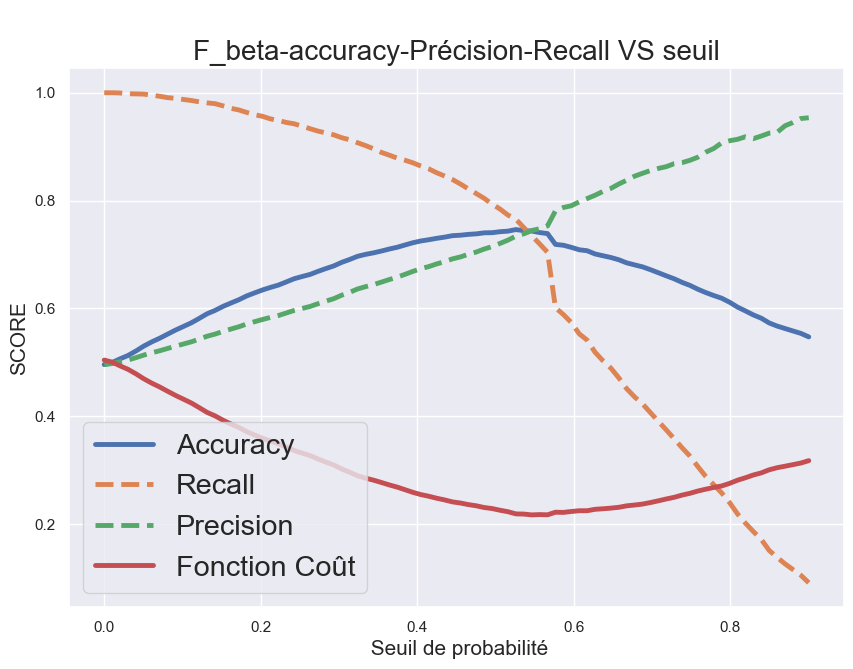

In [17]:
print_scores( Y_true=test_data[best_proc].labels, Y_proba = Y_proba_XGB, line_width = 3.5, seuil = np.linspace( 0, 0.9, 90 ),
             plot_kind = "aprc", give_results = False , show_graph = True, poids = Poids, fig_sz = (10,7) )

* ### <strong> Valeur de seuil de probabilité pour un cout métier minimum  </strong>

In [18]:
seuil_min = my_cost(test_data[best_proc].labels , Y_proba_XGB, poids= Poids )['seuil_min'][0]
seuil_min

0.5485454545454546

* ### <strong> Prédiction à partir de la valeur de seuil  </strong>

In [19]:
Y_test_predict = prediction_function_threshold ( Y_proba= Y_proba_XGB , seuil = seuil_min ) 
Y_train_predict = prediction_function_threshold ( Y_proba= pipe_classifier.predict_proba(train_data_emb[best_proc])[:,1] ,
                                                  seuil = seuil_min ) 

* ### <strong> Accuracy des donnée d'entrainement  </strong>

In [20]:
metrics.accuracy_score( train_data[best_proc].labels, Y_train_predict ) 

0.7893994925288976

* ### <strong> Accuracy des donnée de test  </strong>

In [21]:
metrics.accuracy_score( test_data[best_proc].labels, Y_test_predict )

0.7437212222687317

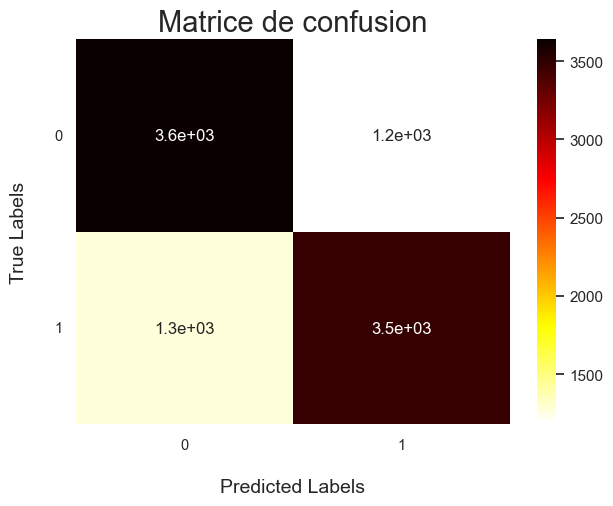

In [22]:
plot_confusion_matrix( test_data[best_proc].labels , Y_test_predict , figsize=(7,5) )

In [23]:
print( metrics.classification_report(test_data[best_proc].labels , Y_test_predict) )

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      4818
           1       0.75      0.73      0.74      4738

    accuracy                           0.74      9556
   macro avg       0.74      0.74      0.74      9556
weighted avg       0.74      0.74      0.74      9556

